# This script is to plot the PSDs of the EEG data

In [19]:
import mne
import numpy as np
import os
import pandas as pd
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes
import seaborn as sns
from fooof.plts import plot_spectra
import scipy.stats as stats

# hide warnings
import warnings
warnings.filterwarnings("ignore")


## Load saved PSD file

In [15]:
# Define the path to the saved PSDs file
load_path = Path('/home/b1044271/Columbia/Results/2025/EEG_PSDs.pkl')

# Load the PSDs from the pickle file
with open(load_path, 'rb') as f:
    psd_data = pickle.load(f)

#load freqs
Freqs = np.load('/home/b1044271/Columbia/Results/2025/EEG_Freqs.npy')

## Define Stage PSDs

In [5]:
# Define stage-specific PSDs
PSDs_W = psd_data.get('Wakefulness', None)
PSDs_N1 = psd_data.get('N1', None)
PSDs_N2 = psd_data.get('N2', None)
PSDs_N3 = psd_data.get('N3', None)
PSDs_R = psd_data.get('REM', None)

# Cz

In [11]:
PSD_Wz = PSDs_W[:,-1,:]
PSD_N1z = PSDs_N1[:,-1,:]
PSD_N2z = PSDs_N2[:,-1,:]
PSD_N3z = PSDs_N3[:,-1,:]
PSD_Rz = PSDs_R[:,-1,:]



## Plot Single Subject

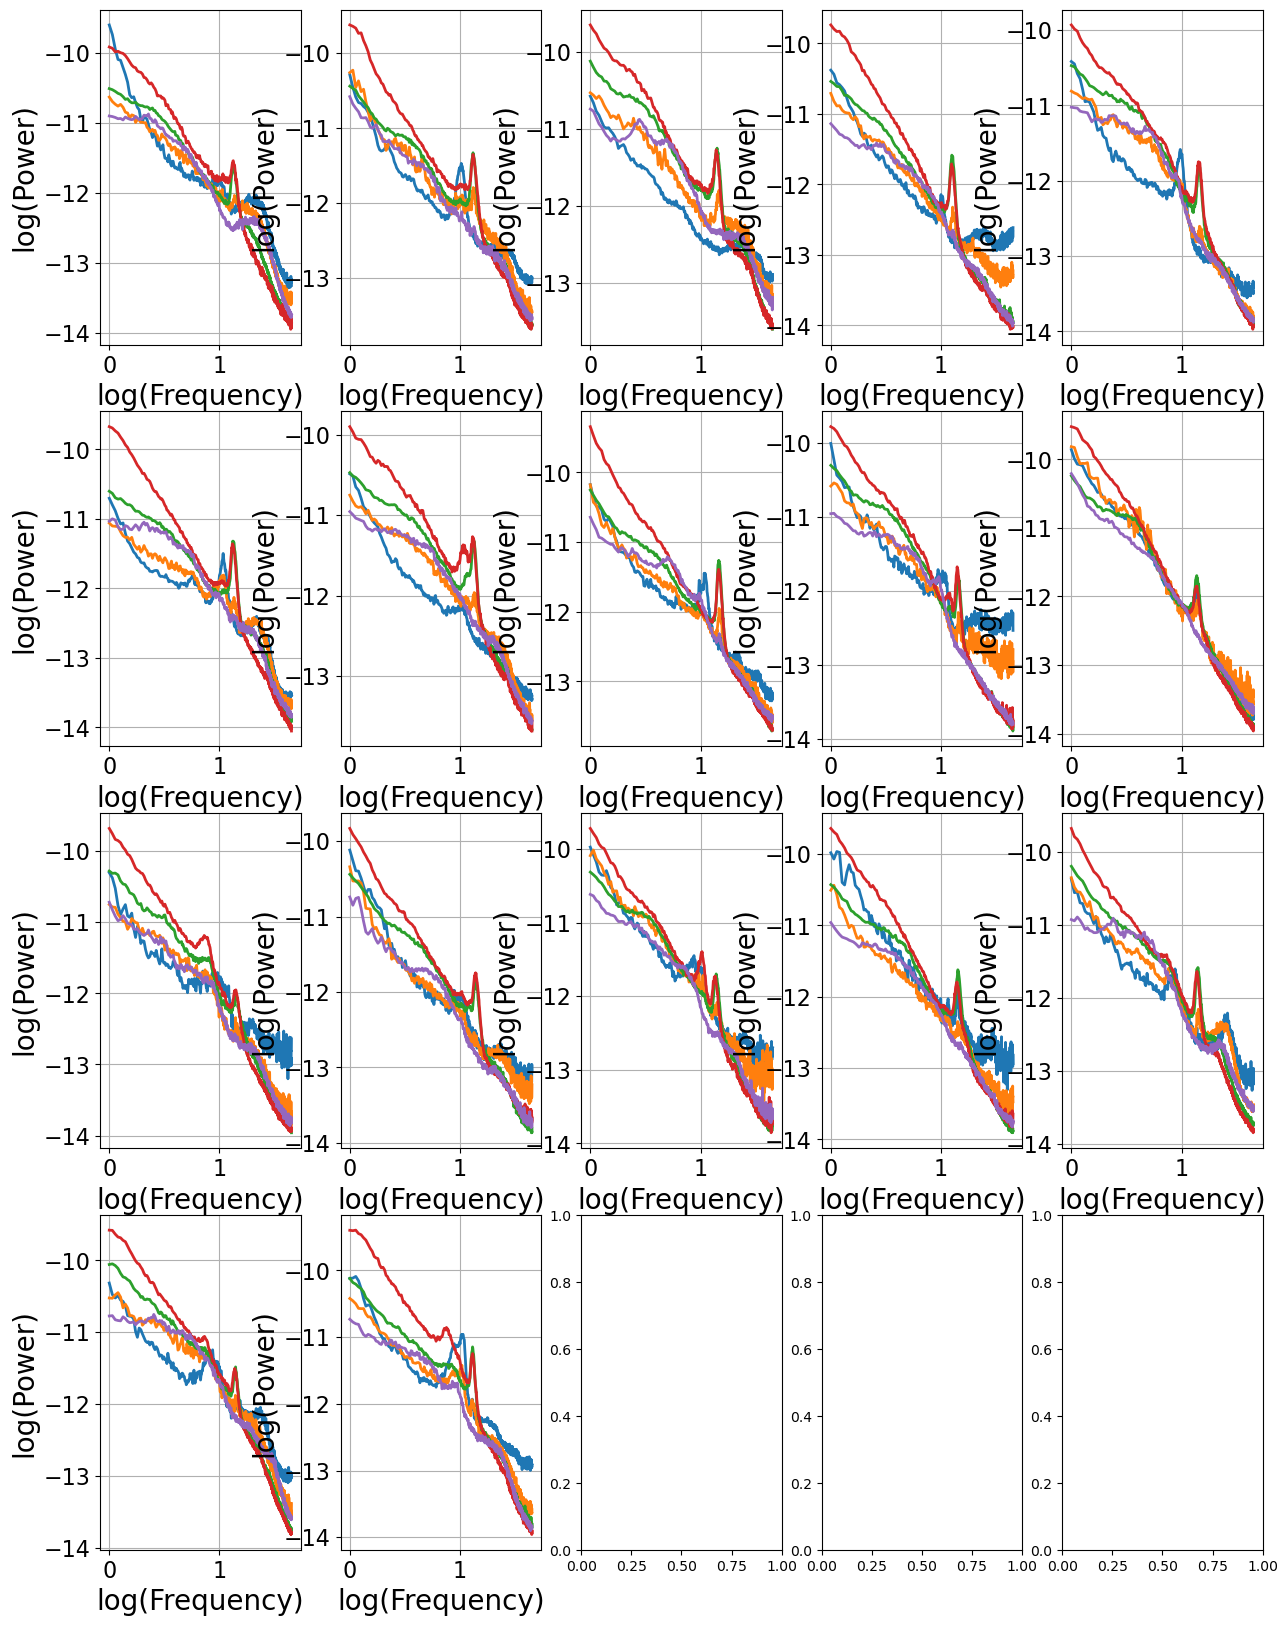

In [17]:
axes = iter(make_axes(20, 5, figsize=(15, 20))) # custom function for subplotting

for S in np.arange(len(PSD_Wz)):

    plot_spectra(Freqs,[PSD_Wz[S],PSD_N1z[S],PSD_N2z[S],PSD_N3z[S],
        PSD_Rz[S]], log_freqs=True, log_powers=True, ax=next(axes))
 

#plt.savefig("Group_PSDs_Trial2_Cz2.svg", dpi = 600 )

# Plot AVERAGE OVER SUBJECTS

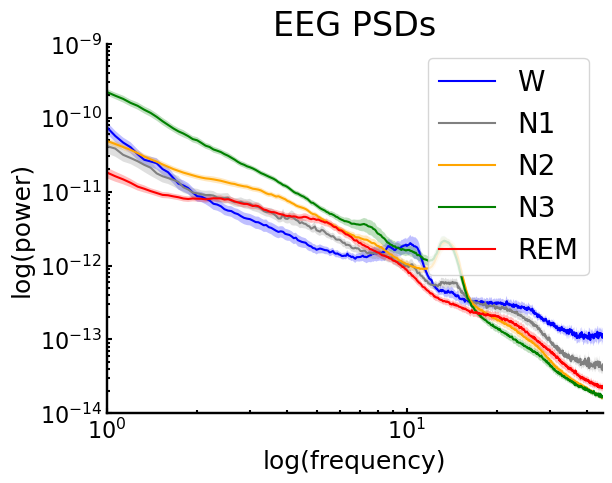

In [23]:
# Mean over subjects

PSDs_Ws = stats.sem(PSD_Wz,0, nan_policy = 'omit')
PSDs_Wm = np.nanmean(PSD_Wz,axis=0)

PSDs_Rs = stats.sem(PSD_Rz,0, nan_policy = 'omit')
PSDs_Rm = np.nanmean(PSD_Rz,axis=0)

PSDs_N2s = stats.sem(PSD_N2z, nan_policy = 'omit')
PSDs_N2m = np.nanmean(PSD_N2z, axis=0)

PSDs_N3s = stats.sem(PSD_N3z,0, nan_policy = 'omit')
PSDs_N3m = np.nanmean(PSD_N3z,axis=0)

PSDs_N1s = stats.sem(PSD_N1z,0, nan_policy = 'omit')
PSDs_N1m = np.nanmean(PSD_N1z,axis=0)

#########
# Plotting
ColStage = [sns.color_palette("colorblind")[0], 
            sns.color_palette("colorblind")[7], 
        sns.color_palette("colorblind")[2],sns.color_palette("colorblind")[3]]

plt.plot(Freqs,np.nanmean(PSD_Wz,0),ColStage[1],label='W')
plt.fill_between(Freqs,PSDs_Wm-PSDs_Ws, PSDs_Wm+PSDs_Ws,facecolor=ColStage[1], alpha=0.25)

plt.plot(Freqs,np.nanmean(PSD_N1z,0), ColStage[2], label ='N1')
plt.fill_between(Freqs,PSDs_N1m-PSDs_N1s, PSDs_N1m+PSDs_N1s,facecolor=ColStage[2], alpha=0.25)

plt.plot(Freqs,np.nanmean(PSD_N2z,0), 'orange', label='N2')
plt.fill_between(Freqs,PSDs_N2m-PSDs_N2s, PSDs_N2m+PSDs_N2s,facecolor='orange', alpha=0.25)

plt.plot(Freqs,np.nanmean(PSD_N3z,0), 'green', label='N3')
plt.fill_between(Freqs,PSDs_N3m-PSDs_N3s, PSDs_N3m+PSDs_N3s,facecolor='green', alpha=0.25)

plt.plot(Freqs,np.nanmean(PSD_Rz,0), 'r', label='REM')
plt.fill_between(Freqs,PSDs_Rm-PSDs_Rs, PSDs_Rm+PSDs_Rs,facecolor='r', alpha=0.25)



# PLOTTING
plt.title('EEG PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18 )
plt.yscale('log')
plt.xscale('log')
plt.xlim(Freqs[0],Freqs[-1])#
plt.ylim(10e-15,10e-10)
plt.ylabel('log(power)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/EEG_PSDs_Group_Cz.svg", dpi = 600 )

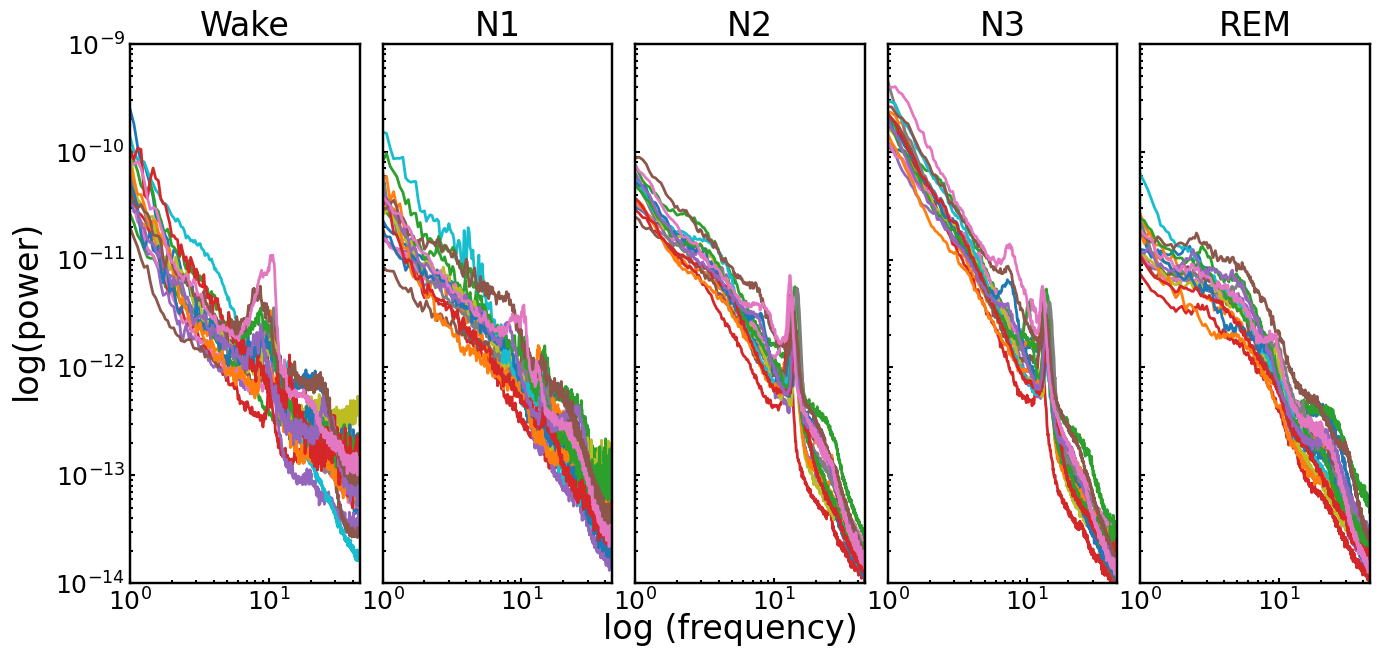

In [22]:
titles =  ['Wake','N1','N2','N3', 'REM']
array_list = [PSD_Wz, PSD_N1z,PSD_N2z, PSD_N3z, PSD_Rz]

# Plotting
#fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 6)) # create a subplot
fig, ax = plt.subplots(1,5, sharex=True, sharey=True, figsize=(16,7.))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for i, V in enumerate(array_list):
    
    ax[i].loglog(Freqs, np.transpose(V),linewidth=2)
    ax[i].set_title(titles[i], fontsize =24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim(Freqs[0],Freqs[-1])#
    plt.ylim(10e-15,10e-10)
    
fig.text(0.5, 0.03, 'log (frequency)', ha='center', fontsize=24)
fig.text(0.05, 0.5, 'log(power)', va='center', rotation='vertical' , fontsize=24)

for axs in ax.flatten():

    axs.spines['top'].set_linewidth(1.75)
    axs.spines['right'].set_linewidth(1.75)
    axs.spines['bottom'].set_linewidth(1.75)
    axs.spines['left'].set_linewidth(1.75)   # Set the linewidth of the left axis line
    axs.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=18)  # Customize tick properties

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/EEG_PSDs_SingleS_Cz.svg", dpi = 600 )